# Implementation of Linear Regression from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
#load and split the data
data = load_boston()
X, y = data['data'], data['target']

In [3]:
#custom train test split
def train_test_divide(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    train_size = 1- test_size
    arr_rand = np.random.rand(X.shape[0])                 # returns X.shape[0] random values between 0 and 1
    split = arr_rand < np.percentile(arr_rand, (100*0.7)) # returns true /false for the values in the array 
    X_train = X[split]
    y_train = y[split]
    X_test = X[~split]
    y_test = y[~split]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_divide(X, y)

In [4]:
#cost function - Mean square error
def mse(preds, y):
    m = len(y)
    cost = (1/m) * (np.sum(np.square(y-preds)))
    return cost

In [5]:
class LinearRegression:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.m = len(y)
        self.bgd = False
    
    def add_intercept_term(self, X):
        X = np.insert(X, 1, np.ones(X.shape[0:1]), axis=1).copy()
        return X
    
    def feature_scale(self, X):
        X = (X - X.mean()) / (X.std())
        return X
    
    def initialize_thetas(self):
        np.random.seed(42)
        self.thetas = np.random.rand(self.X.shape[1])
        
    def normal_equations(self):
        A = np.linalg.inv(np.dot(self.X.T, self.X))
        B = np.dot(self.X.T, self.y)
        thetas = np.dot(A,B)
        return thetas
    
    def batch_gradient_descent(self, alpha, n_iterations):
        self.cost_history = [0] * n_iterations
        self.n_iterations = n_iterations
        for i in range(n_iterations):
            h = np.dot(self.X, self.thetas.T)
            gradient =  alpha * (1/self.m) * ((h - self.y).dot(self.X))
            self.thetas = self.thetas - gradient
            self.cost_history[i] = mse(np.dot(self.X, self.thetas.T) , self.y)
            return self.thetas
        
    def fit(self, bgd=False, alpha=0.158, n_iterations=4000):
        self.X = self.add_intercept_term(self.X)
        self.X = self.feature_scale(self.X)
        if bgd == False:
            self.thetas = self.normal_equations()
        else:
            self.bgd = True
            self.initialize_thetas()
            self.thetas = self.batch_gradient_descent(alpha, n_iterations)
            
    def predict(self, X_test):
        self.X_test = X_test.copy()
        self.X_test = self.add_intercept_term(self.X_test)
        self.X_test = self.feature_scale(self.X_test)
        predictions = np.dot(self.X_test, self.thetas.T)
        return predictions
    
    def plot_cost_function(self):
        
        if self.bgd == True:
            plt.plot(range((self.n_iterations)),self.cost_history)
            plt.xlabel('No. of iterations')
            plt.ylabel('Cost Function')
            plt.title('Gradient Descent Cost Function Line Plot')
            plt.show()
        else:
            print('Batch Gradient Descent was not used!')

### Gradient Descent

In [6]:
lin_reg_bgd = LinearRegression(X_train, y_train)
lin_reg_bgd.fit(bgd=True)

In [7]:
mse(y_test, lin_reg_bgd.predict(X_test))

684.8118946719213

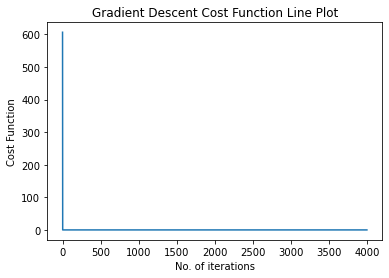

In [8]:
lin_reg_bgd.plot_cost_function()

In [9]:
lin_reg_normal = LinearRegression(X_train, y_train)
lin_reg_normal.fit()
mse(y_test, lin_reg_normal.predict(X_test))

22.15141775965222